In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/toprich/top rich2024.csv
/kaggle/input/the-500-richest-businessmen/__results__.html
/kaggle/input/the-500-richest-businessmen/__notebook__.ipynb
/kaggle/input/the-500-richest-businessmen/__output__.json
/kaggle/input/the-500-richest-businessmen/custom.css
/kaggle/input/the-500-richest-businessmen/__results___files/__results___19_6.png
/kaggle/input/the-500-richest-businessmen/__results___files/__results___25_0.png
/kaggle/input/the-500-richest-businessmen/__results___files/__results___19_0.png
/kaggle/input/the-500-richest-businessmen/__results___files/__results___22_0.png
/kaggle/input/the-500-richest-businessmen/__results___files/__results___19_3.png
/kaggle/input/the-500-richest-businessmen/__results___files/__results___29_1.png
/kaggle/input/the-500-richest-businessmen/__results___files/__results___19_1.png
/kaggle/input/the-500-richest-businessmen/__results___files/__results___19_5.png
/kaggle/input/the-500-richest-businessmen/__results___files/__results___27_0.png
/

**Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import warnings 
warnings.filterwarnings('ignore')

**Load Dataset******

In [3]:
df = pd.read_csv(r'/kaggle/input/toprich/top rich2024.csv')

In [4]:
df.head()

,Rank,Name,Total net worth,$ Last change,$ YTD change,Country / Region,Industry
0,1,Elon Musk,$447B,+$62.8B,+$218B,United States,Technology
1,2,Jeff Bezos,$249B,+$4.65B,+$72.1B,United States,Technology
2,3,Mark Zuckerberg,$224B,+$4.58B,+$95.5B,United States,Technology
3,4,Larry Ellison,$198B,+$1.63B,+$75.3B,United States,Technology
4,5,Bernard Arnault,$181B,+$1.32B,-$26.4B,France,Consumer


In [5]:
df.info

<bound method DataFrame.info of      Rank                       Name Total net worth  $ Last change   \
0       1                  Elon Musk            $447B        +$62.8B   
1       2                 Jeff Bezos            $249B        +$4.65B   
2       3            Mark Zuckerberg            $224B        +$4.58B   
3       4              Larry Ellison            $198B        +$1.63B   
4       5            Bernard Arnault            $181B        +$1.32B   
..    ...                        ...              ...            ...   
495   496               Igor Bukhman           $6.41B        -$27.0M   
496   497             Dmitry Bukhman           $6.41B        -$27.0M   
497   498        Renate Reimann-Haas           $6.38B             $0   
498   499  Matthias Reimann-Andersen           $6.38B             $0   
499   500    Stefan Reimann-Andersen           $6.38B             $0   

    $ YTD change Country / Region    Industry  
0         +$218B    United States  Technology  
1      

In [6]:
df.describe(include='all')

,Rank,Name,Total net worth,$ Last change,$ YTD change,Country / Region,Industry
count,500.000000,500,500,500,500,500,500
unique,NaN,500,318,373,412,48,14
top,NaN,Elon Musk,$12.4B,$0,+$1.01B,United States,Technology
freq,NaN,1,8,42,4,191,83
mean,250.500000,NaN,NaN,NaN,NaN,NaN,NaN
std,144.481833,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,125.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,250.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,375.250000,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(500, 7)

In [8]:
df.isnull().sum()

Rank                0
 Name               0
Total net worth     0
$ Last change       0
$ YTD change        0
Country / Region    0
Industry            0
dtype: int64

In [9]:
df.duplicated().sum()

0

Data manipulation

In [10]:
df.head()

,Rank,Name,Total net worth,$ Last change,$ YTD change,Country / Region,Industry
0,1,Elon Musk,$447B,+$62.8B,+$218B,United States,Technology
1,2,Jeff Bezos,$249B,+$4.65B,+$72.1B,United States,Technology
2,3,Mark Zuckerberg,$224B,+$4.58B,+$95.5B,United States,Technology
3,4,Larry Ellison,$198B,+$1.63B,+$75.3B,United States,Technology
4,5,Bernard Arnault,$181B,+$1.32B,-$26.4B,France,Consumer


In [11]:
df['Total net worth '] = df['Total net worth '].str.replace("$", "")
df['Total net worth '] = df['Total net worth '].str.replace("B", "")

df['$ Last change '] = df['$ Last change '].str.replace("$", "")
df['$ Last change '] = df['$ Last change '].str.replace("B", "")
df['$ Last change '] = df['$ Last change '].str.replace("M", "")

df['$ YTD change'] = df['$ YTD change'].str.replace("$", "")
df['$ YTD change'] = df['$ YTD change'].str.replace("B", "")
df['$ YTD change'] = df['$ YTD change'].str.replace("M", "")

df.head()

,Rank,Name,Total net worth,$ Last change,$ YTD change,Country / Region,Industry
0,1,Elon Musk,447,+62.8,+218,United States,Technology
1,2,Jeff Bezos,249,+4.65,+72.1,United States,Technology
2,3,Mark Zuckerberg,224,+4.58,+95.5,United States,Technology
3,4,Larry Ellison,198,+1.63,+75.3,United States,Technology
4,5,Bernard Arnault,181,+1.32,-26.4,France,Consumer


In [12]:
 df.select_dtypes(include=[np.number])

,Rank
0,1
1,2
2,3
3,4
4,5
...,...
495,496
496,497
497,498
498,499


In [13]:
df.dtypes

Rank                 int64
 Name               object
Total net worth     object
$ Last change       object
$ YTD change        object
Country / Region    object
Industry            object
dtype: object

In [14]:
df.head()

,Rank,Name,Total net worth,$ Last change,$ YTD change,Country / Region,Industry
0,1,Elon Musk,447,+62.8,+218,United States,Technology
1,2,Jeff Bezos,249,+4.65,+72.1,United States,Technology
2,3,Mark Zuckerberg,224,+4.58,+95.5,United States,Technology
3,4,Larry Ellison,198,+1.63,+75.3,United States,Technology
4,5,Bernard Arnault,181,+1.32,-26.4,France,Consumer


<Axes: >

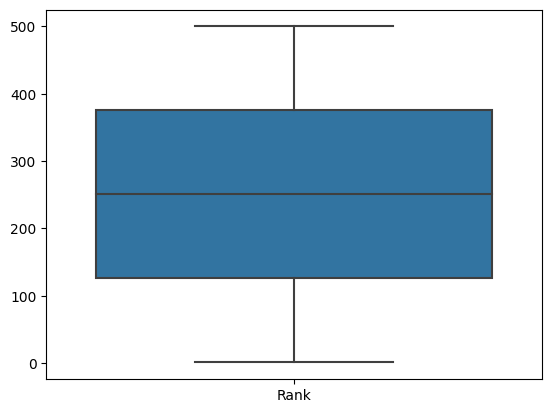

In [15]:
sns.boxplot(data=df)

**Data Visualization******

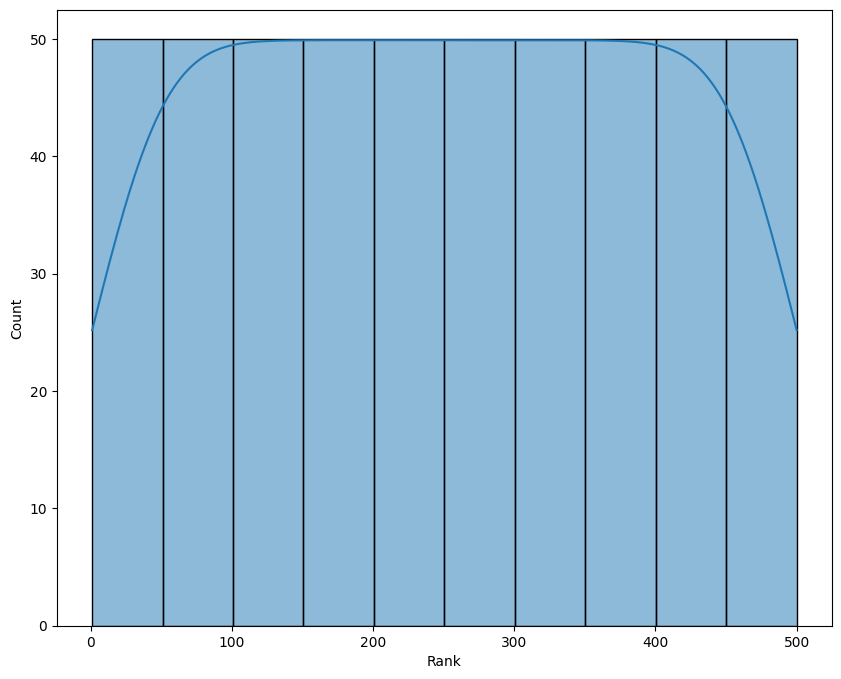

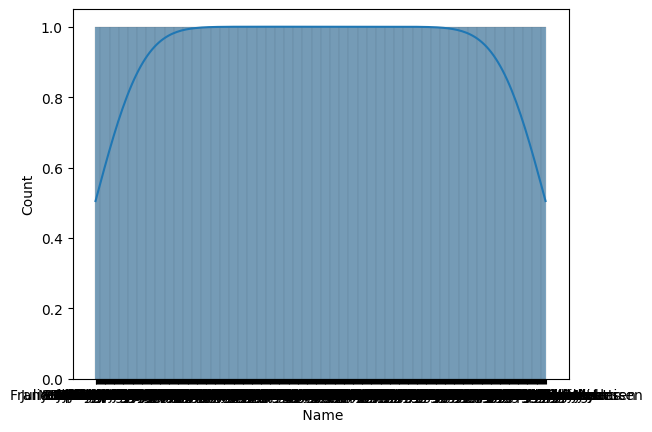

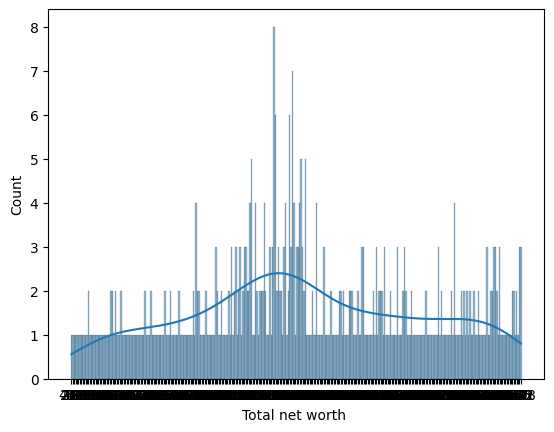

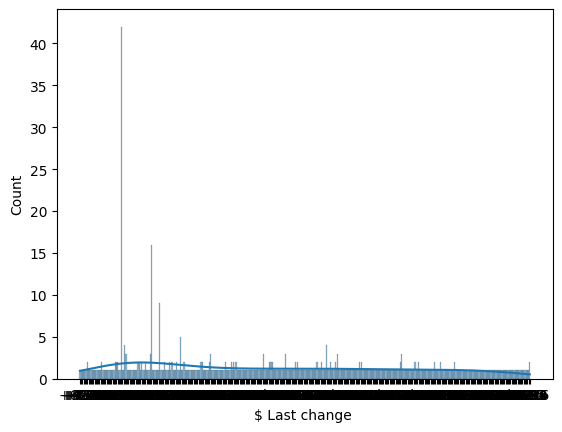

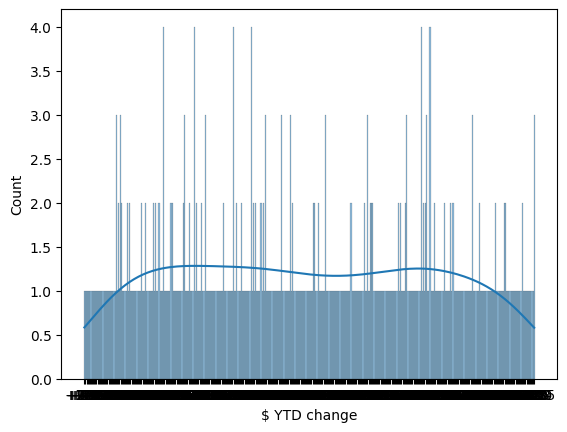

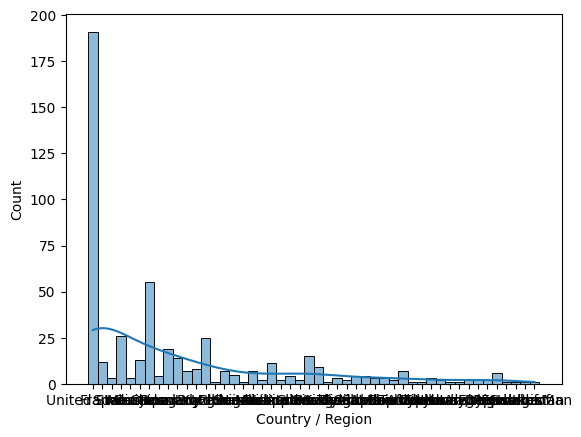

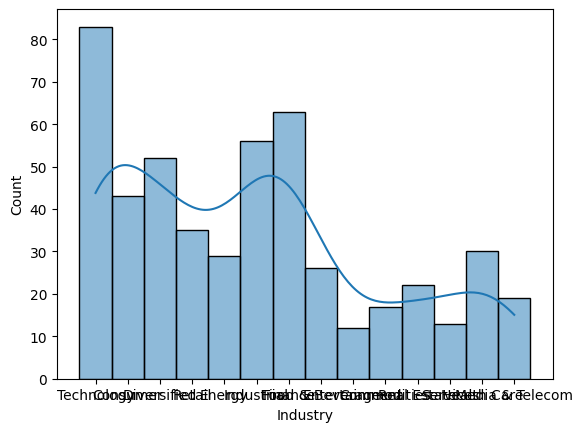

In [16]:
plt.figure(figsize=(10,8))
for col in df:
    sns.histplot(x=col,data=df,kde=True)
    plt.show()

In [17]:
#top 10 richest businessmen
df[ ' Name'].head(10)

0          Elon Musk
1         Jeff Bezos
2    Mark Zuckerberg
3      Larry Ellison
4    Bernard Arnault
5         Larry Page
6         Bill Gates
7        Sergey Brin
8      Steve Ballmer
9     Warren Buffett
Name:  Name, dtype: object

In [18]:
df['Country / Region'].head(10).unique()

array(['United States', 'France'], dtype=object)

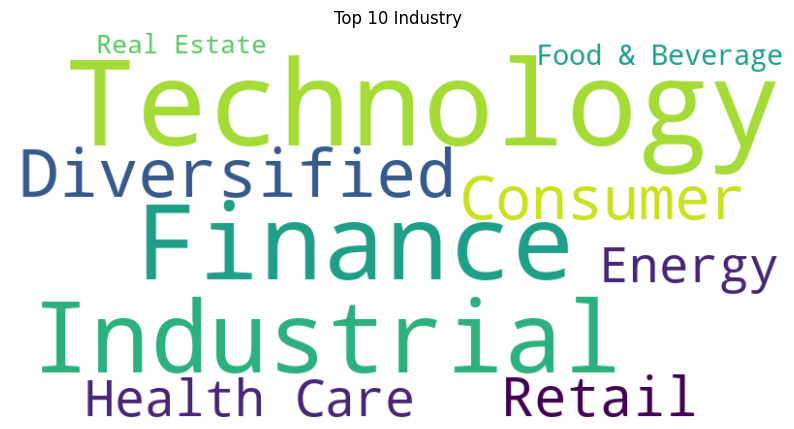

In [19]:
#top 10 industry by word cloud
from wordcloud import WordCloud
top_10=df['Industry'].value_counts().head(10)

counts=dict(top_10)

wordcloud=WordCloud(width=800,height=400,background_color='White').generate_from_frequencies(counts)


plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 Industry')
plt.show()

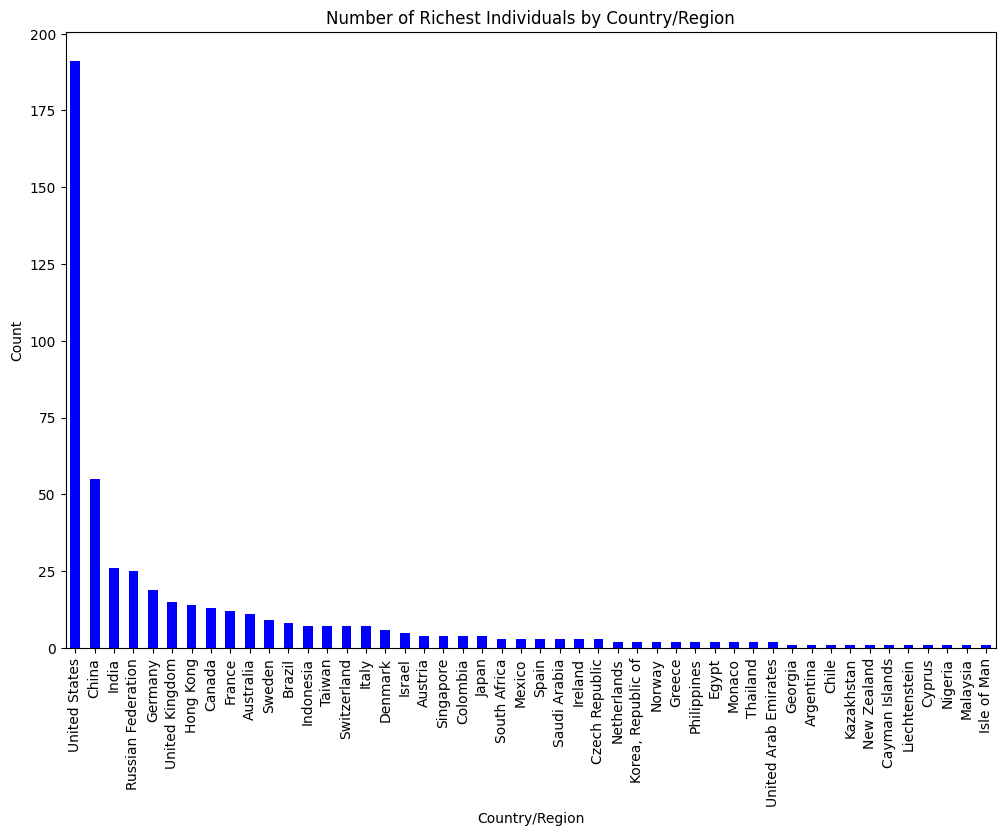

In [20]:
region_counts = df['Country / Region'].value_counts()

# Bar chart
plt.figure(figsize=(12, 8))
region_counts.plot(kind='bar', color='blue')
plt.title('Number of Richest Individuals by Country/Region')
plt.xlabel('Country/Region')
plt.ylabel('Count')
plt.show()

In [21]:
df[['Total net worth ']]=df[['Total net worth ']].astype("float")

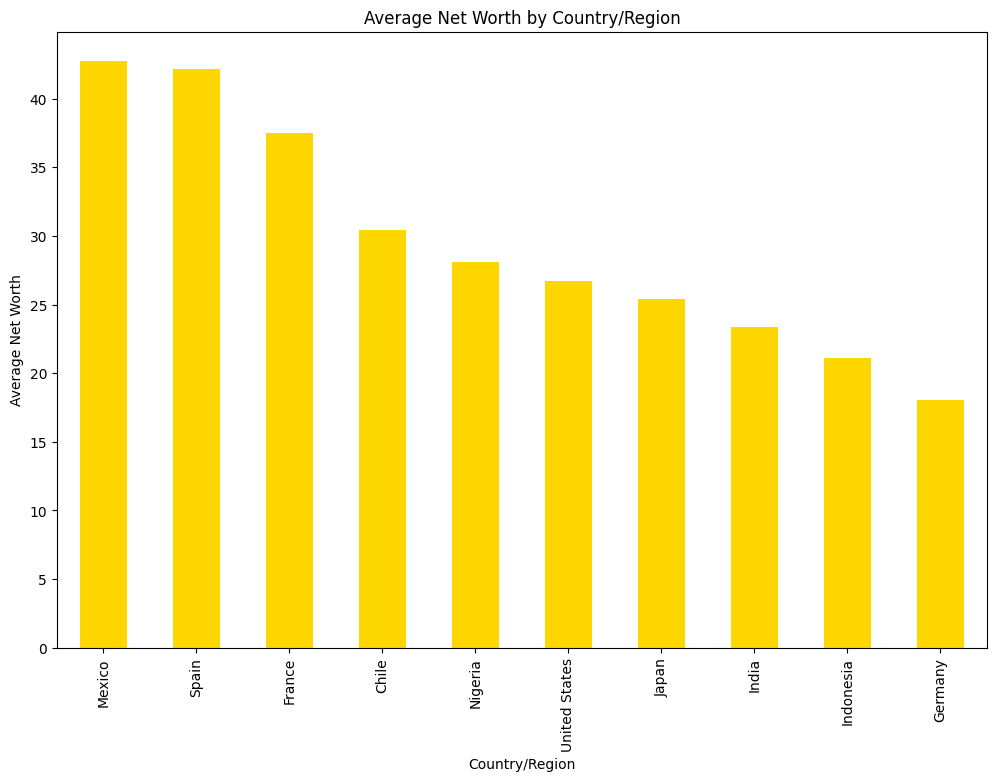

In [22]:
region_wealth = df.groupby('Country / Region')['Total net worth '].mean().sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(12, 8))
region_wealth.head(10).plot(kind='bar', color='gold')  
plt.title('Average Net Worth by Country/Region')
plt.xlabel('Country/Region')
plt.ylabel('Average Net Worth')
plt.show()

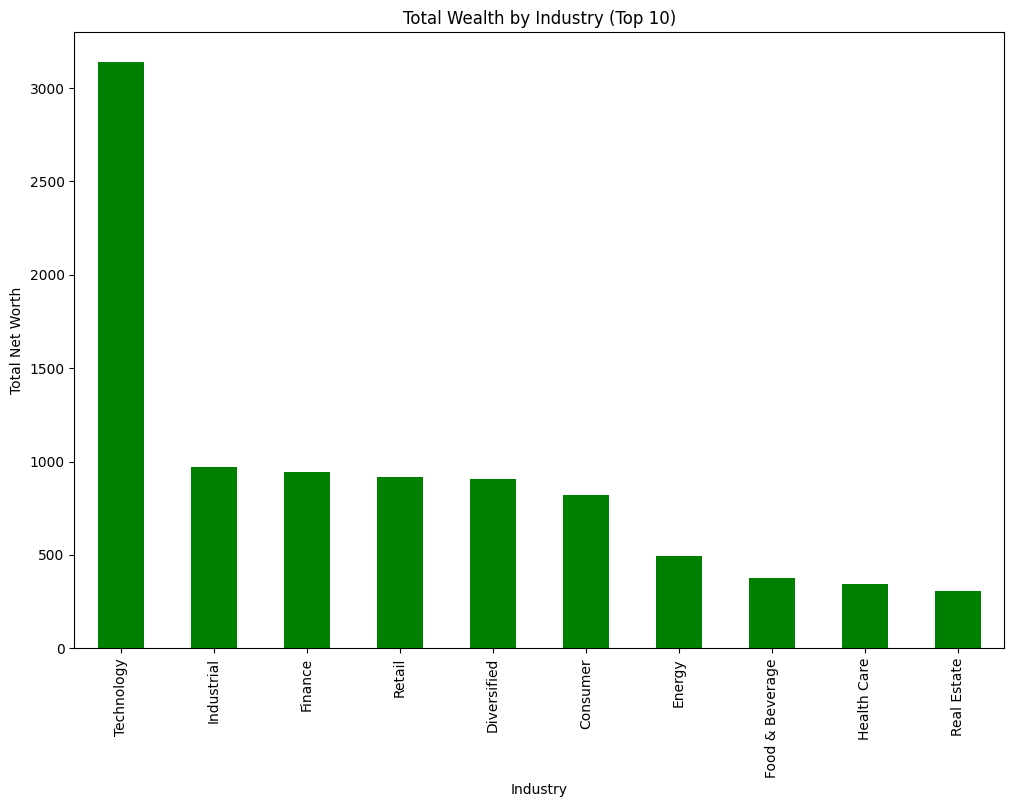

In [23]:
industry_wealth = df.groupby('Industry')['Total net worth '].sum().sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(12, 8))
industry_wealth.head(10).plot(kind='bar', color='Green')
plt.title('Total Wealth by Industry (Top 10)')
plt.xlabel('Industry')
plt.ylabel('Total Net Worth')
plt.show()

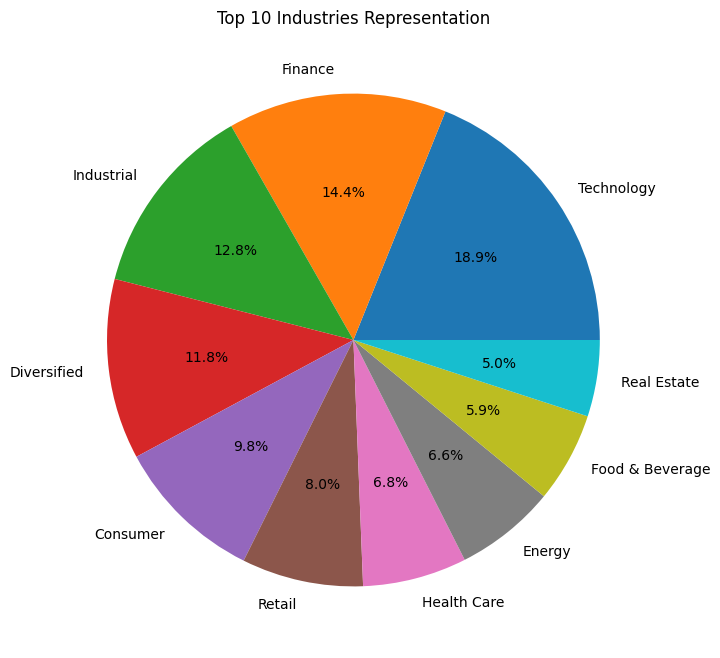

In [24]:
# Count individuals by industry
industry_counts = df['Industry'].value_counts()

# Pie chart
plt.figure(figsize=(10, 8))
industry_counts.head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 10 Industries Representation')
plt.ylabel('')
plt.show()

In [25]:
df[["$ YTD change"]]=df[["$ YTD change"]].astype("float")

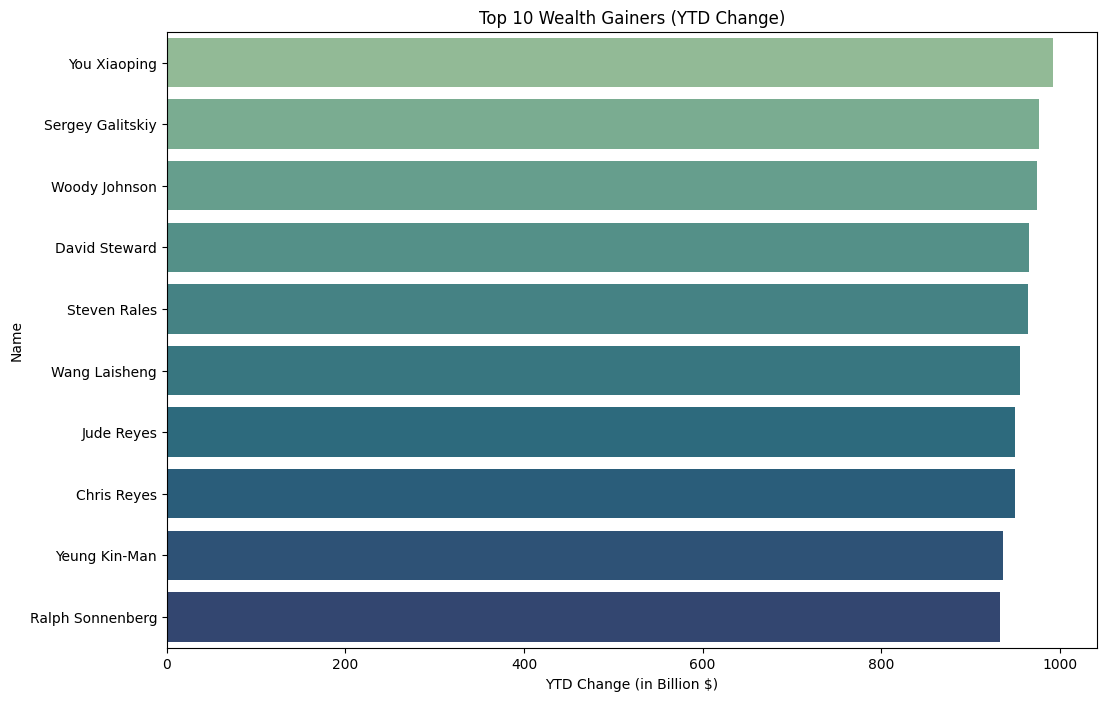

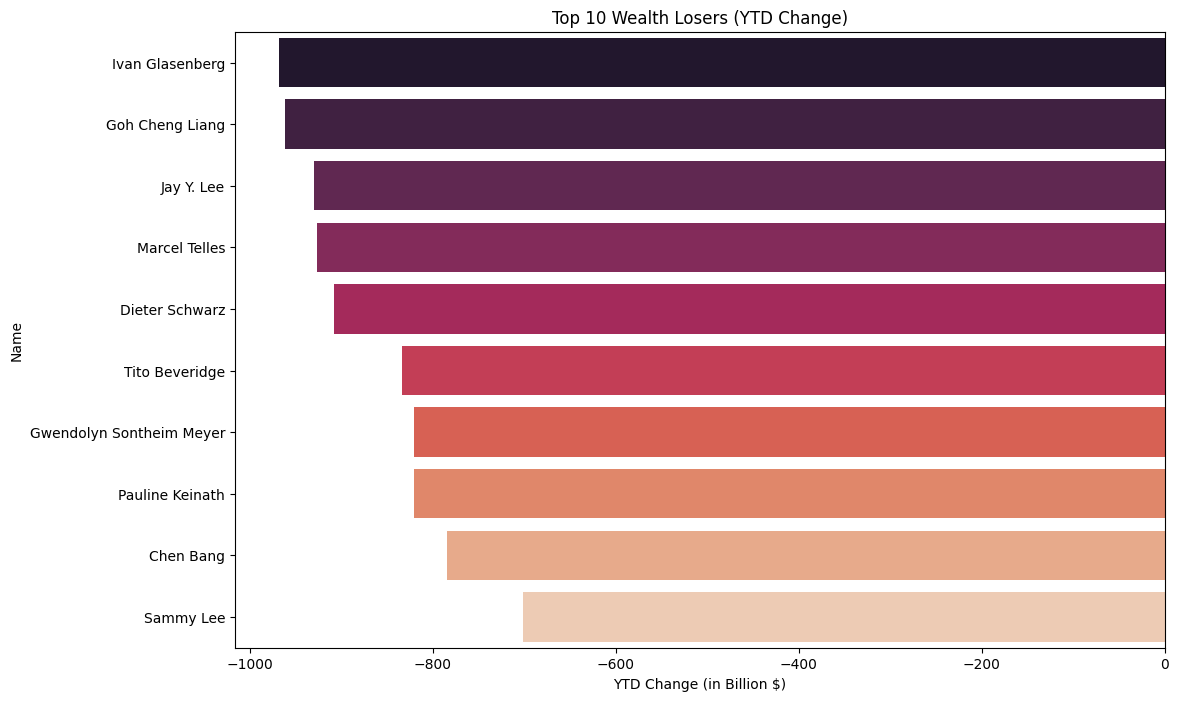

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort data by YTD change
top_10_gainers = df.nlargest(10, '$ YTD change')
top_10_losers = df.nsmallest(10, '$ YTD change')

# Plot Top 10 Gainers
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_gainers, x='$ YTD change', y=' Name', palette='crest')
plt.title('Top 10 Wealth Gainers (YTD Change)')
plt.xlabel('YTD Change (in Billion $)')
plt.ylabel('Name')
plt.show()

# Plot Top 10 Losers
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_losers, x='$ YTD change', y=' Name', palette='rocket')
plt.title('Top 10 Wealth Losers (YTD Change)')
plt.xlabel('YTD Change (in Billion $)')
plt.ylabel('Name')
plt.show()


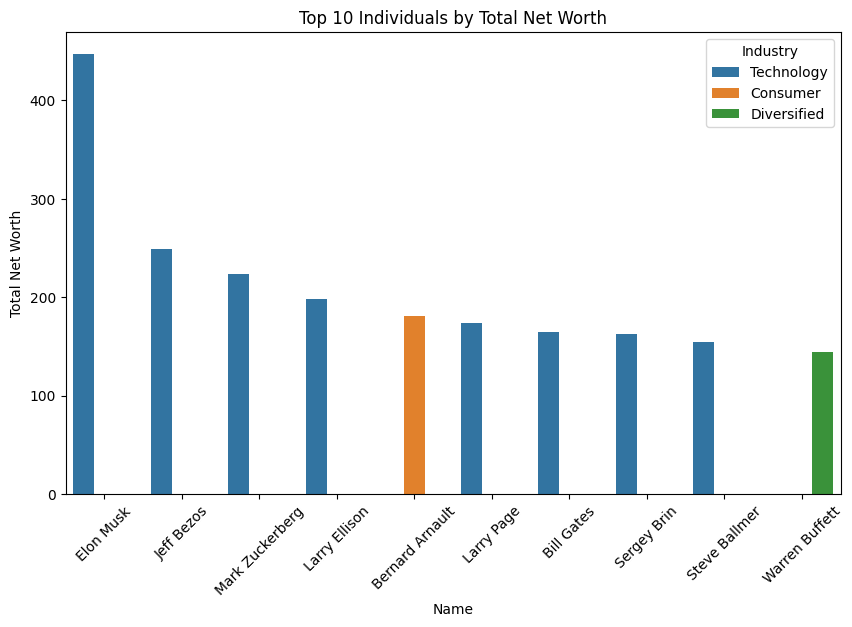

In [27]:

# Select the top 10 entries by 'Total net worth'
top_10 = df.nlargest(10, 'Total net worth ')

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=' Name', y='Total net worth ', hue='Industry', data=top_10)
plt.title('Top 10 Individuals by Total Net Worth')
plt.xlabel('Name')
plt.ylabel('Total Net Worth')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()



**** ````````````````````````Thank You`````````````````````````********
